In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import keras
import tensorflow as tf
from keras.models import load_model
import numpy as np
from google.colab import files
import matplotlib.image as mpimg
from keras.preprocessing.image import image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
model1 = tf.keras.models.load_model('/content/drive/My Drive/plantdisease30_1_1_1(resnet50,0.1test,0.001lr).h5')

Saving applescab1.PNG to applescab1.PNG


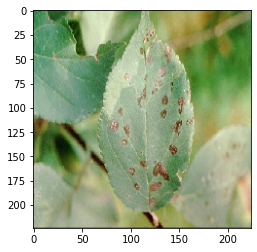

In [21]:
uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

predictions_load = model1.predict(x)
plt.imshow(img)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Bercak Bakteri Tomat


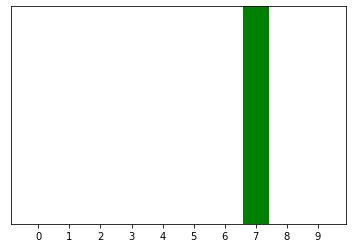

In [22]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('green')

probabilitas = predictions_load[0]
kategori = np.argmax(predictions_load[0])
if kategori == 0: kategori = 'Keropeng Apel'
if kategori == 1: kategori = 'Busuk Hitam Apel'
if kategori == 2: kategori = 'Busuk Hitam Anggur'
if kategori == 3: kategori = 'Esca Anggur'
if kategori == 4: kategori = 'Hawar Daun Anggur'
if kategori == 5: kategori = 'Bercak Kering Kentang'
if kategori == 6: kategori = 'Hawar Daun Kentang'
if kategori == 7: kategori = 'Bercak Bakteri Tomat'
if kategori == 8: kategori = 'Bercak Septoria Tomat'
if kategori == 9: kategori = 'Bercak Coklat Tomat'

print(probabilitas)
print(kategori)
try:
  plot_value_array(1, predictions_load[0], ['Keropeng Apel','Busuk Hitam Apel','Busuk Hitam Anggur','Esca Anggur','Hawar Daun Anggur','Bercak Kering Kentang','Hawar Daun Kentang','Bercak Bakteri Tomat','Bercak Septoria Tomat','Bercak Coklat Tomat'])
  _ = plt.xticks(range(10), class_names, rotation=45)
except Exception as e: pass